# 1. Importar Bibliotecas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import joblib  # Para salvar o modelo


# 2. Carregar os Dados

In [23]:
print("Loading data...")
df = pd.read_csv("vendas_sorvetes.csv")
print(df.head())


Loading data...
         Data  Vendas  Temp
0  2023-01-01     196  30.0
1  2023-01-02     218  30.2
2  2023-01-03     270  32.8
3  2023-01-04     269  32.6
4  2023-01-05     228  31.2


# 3. Preparar os Dados

In [24]:
print("Preparing data...")
X = df[['Temp']].values  # variável independente
y = df['Vendas'].values  # variável dependente


Preparing data...


# 4. Dividir os Dados

In [25]:
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting data...


# 5. Treinar o Modelo

In [26]:
print("Training model...")
model = LinearRegression()
model.fit(X_train, y_train)


Training model...


LinearRegression()

# 6. Avaliar o Modelo

In [27]:
print("Evaluating model...")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Evaluating model...
Mean Squared Error: 210.61
R² Score: 0.96


# 7. Exibir os Resultados

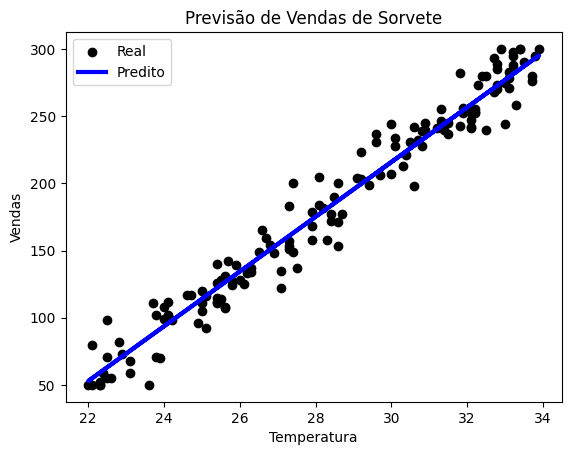

In [28]:
plt.scatter(X_test, y_test, color='black', label='Real')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predito')
plt.xlabel('Temperatura')
plt.ylabel('Vendas')
plt.title('Previsão de Vendas de Sorvete')
plt.legend()
plt.show()


# 8. Salvar o Modelo

In [29]:
print("Saving model...")
joblib.dump(model, 'modelo_vendas_sorvete.pkl')
print("Model saved as 'modelo_vendas_sorvete.pkl'")


Saving model...
Model saved as 'modelo_vendas_sorvete.pkl'


# Calcular MAE - Erro Médio Absoluto

In [30]:
mae = mean_absolute_error(y_test, y_pred)

print(f"O erro médio absoluto é de aproximadamente {mae:.0f} sorvetes.")


O erro médio absoluto é de aproximadamente 12 sorvetes.


# Exemplo: Previsão de Vendas em Temperaturas Diferentes

In [31]:
temperaturas_novas = np.array([[25], [30], [33]])
vendas_previstas = model.predict(temperaturas_novas)

for temp, venda in zip(temperaturas_novas.flatten(), vendas_previstas):
    print(f"A {temp} graus, previsão de {venda:.0f} sorvetes vendidos.")


A 25 graus, previsão de 114 sorvetes vendidos.
A 30 graus, previsão de 216 sorvetes vendidos.
A 33 graus, previsão de 277 sorvetes vendidos.
